# Spark Machine learning 

### Learning goals:
- align the relationships between Hadoop, Spark, and Databricks
- differentiate between Spark RDDs and Spark Dataframes and when each is appropriate
- locate and explore the Spark.ML documentation
- code along a text classification problem using four different ml algorithms, a data prep pipeline, and gridsearch to fine tune a model

# Spark context and concepts review
![sparkler](https://images.pexels.com/photos/285173/pexels-photo-285173.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)

# The story of Spark (in diagrams)

## Start with Hadoop
![diagram of hadoop v1 compared to hadoop v2](img/yarn.png)
[diagram source](https://sites.google.com/site/codingbughunter/hadoop/yarn-general-discribe)

## Yarn facilitates the resource allocation between Spark and the HDFS
### YARN = Yet Another Resource Negotiator
#### YARN is a subproduct of Hadoop
![yarn diagram with spark](http://hortonworks.com/wp-content/uploads/2013/06/YARN.png)

[diagram source](https://sites.google.com/site/codingbughunter/hadoop/yarn-general-discribe)

## Then visualize the Spark ecosystem built on top of that

![diagram of spark eco system components](img/spark_eco.png)

[image source here](https://databricks.com/spark/about)

# The story of Spark (a timeline)

|<p align="left justify">Date</p>|<p align="left justify">Product</p>|<p align="left justify">Update</p>|
|:----|:-----|:-----|
| 2002 | Hadoop | <p align="left justify">Doug Cutting starts `Apache Nutch` researching sort/merge processing</p> |
| 2006 | Hadoop |  <p align="left justify">Leaves `Nutch` and joins `Yahoo`, renaming the project `Hadoop` </p>|
| 2008 | Hadoop |  <p align="left justify">`Hadoop` was made `Apache’s` top level project </p> |
| Jan 2008 | Hadoop |  <p align="left justify">v 0.10.1 released </p>|
| 2009 | Spark | <p align="left justify">started as a research project at the UC Berkeley AMPLab  </p>|
| 2010 | Spark |  <p align="left justify">open sourced </p>|
| Sept 2012 | Spark |  <p align="left justify">0.6.0 released </p>|
| 2013 | Spark |  <p align="left justify">moved to the `Apache` Software Foundation </p>|
| Feb 2013| Spark |  <p align="left justify">Spark 0.7 adds a Python API called `PySpark` </p>|
| Sept 2013 | Spark | <p align="left justify">0.8.0 introduces `MLlib` </p>|
| 2013 | Databricks |  <p align="left justify">Original Spark research team at UC Berkeley found Databricks</p> |
| May 2014 |Spark |  <p align="left justify">v 1.0 introduces Spark SQL, for loading and manipulating structured data in Spark</p>|
| Sept 2014 | Spark|  <p align="left justify">v 1.1.0 provided support for registering Python lambda funtions as UDFs</p>|
|Mar 2015 | Spark | <p align="left justify"> v 1.3.0 brings a new DataFrame API</p> |
| Jun 2015 | Spark | <p align="left justify"> v 1.4.0 brings an R API to Spark</p> |
| 2015 | Databricks | <p align="left justify"> The Databricks Apache Spark cloud platform goes public</p> |
| Jan 2016|  Spark | <p align="left justify"> v 1.6.0 brings a new Dataset API <br> - A new Spark API, similar to RDDs, that allows users to work with custom objects and lambda functions while still gaining the benefits of the Spark SQL execution engine.</p> |
| Jul 2016 | Spark | <p align="left justify"> v 2.0.0 **big update**! <Br> - Unifying DataFrame and Dataset: In Scala and Java, DataFrame and Dataset have been unified, i.e. DataFrame is just a type alias for Dataset of Row. In Python and R, given the lack of type safety, DataFrame is the main programming interface. <br> - SparkSession: new entry point that replaces the old SQLContext<br>- Native CSV data source, based on Databricks’ spark-csv module<br>- MLlib - The DataFrame-based API is now the primary API. The RDD-based API is entering maintenance mode </p> |
| 2016 | Databricks | <p align="left justify"> Databricks Launches Free Community Edition As Companion To Free Online Spark Courses </p>|
| Jul 2017| Spark | <p align="left justify"> v 2.2.0 drops support for Python 2.6 |
| Nov 2018 | Spark | <p align="left justify"> v 2.4.0<br> - This release adds Barrier Execution Mode for better integration with deep learning frameworks<br> - more integration between pandas UDF and spark DataFrames </p>|


# Spark data objects

![diagram of definitions of Spark objects from databricks](https://databricks.com/wp-content/uploads/2018/05/rdd-1024x595.png)

## In Pyspark there are only RDD and DataFrames

In other languages where "compiling" is done, there is the distinction between DataFrames and DataSet. 

![dataframe image](https://databricks.com/wp-content/uploads/2018/05/DataFrames.png)

## Differences between objects:
![memory usage](https://databricks.com/wp-content/uploads/2016/07/memory-usage-when-caching-datasets-vs-rdds.png)

### Use an RDD when:
[quoted from databricks](https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html)

> - you want low-level transformation and actions and control on your dataset;
> - your data is unstructured, such as media streams or streams of text;
> - you want to manipulate your data with functional programming constructs than domain specific expressions;
> - you don’t care about imposing a schema, such as columnar format, while processing or accessing data attributes by name or column

### Use a dataframe when:
[also quoted from databricks](https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html)


> - you want rich semantics, high-level abstractions, and domain specific APIs, use DataFrame
> - your processing demands high-level expressions, filters, maps, aggregation, averages, sum, SQL queries, columnar access and use of lambda functions on semi-structured data, use DataFrame
> - you want higher degree of type-safety at compile time, want typed JVM objects, take advantage of Catalyst optimization, and benefit from Tungsten’s efficient code generation, use Dataset.
> - you want unification and simplification of APIs across Spark Libraries, use DataFrame or Dataset.
> - If you are a R user, use DataFrames.
> - If you are a Python user, use DataFrames and resort back to RDDs if you need more control.

**Note**: Machine learning algorithms are run on _DataFrames_

## Review:

- You are grabbing live tweets about the CW show 'Jane the Virgin' for later analysis. In the Spark ecosystem, where should you store them? an RDD or a DataFrame?

- You have an RDD of data that you wish to use to build a predictive model. Should you leave it as an RDD or transform it to a DataFrame?


# Machine learning in Spark
![bbc logo](https://www.nwcu.police.uk/wp-content/uploads/2013/05/BBC-News.png)

Section influenced by [this analysis of twitter data](https://wesslen.github.io/twitter/predicting_twitter_profile_location_with_pyspark/)

## Meet Greg

![greg](img/thinking.jpeg)

## Greg's life is full of pain

Greg has become really tired of his boss asking him to do all these random things.<br>
**First** she had him learn Object Oriented Programming and it's been down hill ever since.<br>
**Now** she's wanting him to send her a summary of political news from the BBC each day.<br>
The problem is it takes him hours just to sort through the BBC website to get *just* the political articles that interest her.

## But wait!
What if rather than sorting through them himself he could build a classification model that will sort only the ones he needs?

### Create spark context

In [1]:
import pyspark
spark = pyspark.sql.SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [2]:
spark

In [3]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

### Read in our dataset of articles

In [16]:
bbc = spark.read.csv(path='data/bbc-text.csv', sep=',',
                     encoding='UTF-8', header=True, inferSchema=True)

In [17]:
def show(df, n=5):
    return df.limit(n).toPandas()

### Do some basic data exploration

In [18]:
bbc.columns

['category', 'text']

In [19]:
bbc.dtypes

[('category', 'string'), ('text', 'string')]

In [20]:
bbc.printSchema()

root
 |-- category: string (nullable = true)
 |-- text: string (nullable = true)



In [21]:
bbc.limit(10).toPandas()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [22]:
bbc.count()

2225

In [23]:
bbc.groupBy('category').count().show()

+-------------+-----+
|     category|count|
+-------------+-----+
|        sport|  511|
|     politics|  417|
|entertainment|  386|
|     business|  510|
|         tech|  401|
+-------------+-----+



In [24]:
# Create a new column of target "politics"
from pyspark.sql.functions import when, col
bbc = bbc.withColumn("label",
                     (when(col("category").like("%politics%"), 1)
                      .otherwise(0)))

In [25]:
# drop original target column
bbc = bbc.drop(bbc.category)

In [26]:
show(bbc,10)

,text,label
0,tv future in the hands of viewers with home th...,0
1,worldcom boss left books alone former worldc...,0
2,tigers wary of farrell gamble leicester say ...,0
3,yeading face newcastle in fa cup premiership s...,0
4,ocean s twelve raids box office ocean s twelve...,0
5,howard hits back at mongrel jibe michael howar...,1
6,blair prepares to name poll date tony blair is...,1
7,henman hopes ended in dubai third seed tim hen...,0
8,wilkinson fit to face edinburgh england captai...,0
9,last star wars not for children the sixth an...,0


## Machine Learning in Spark

Spark's [documentation](https://spark.apache.org/docs/2.2.0/ml-guide.html#mllib-main-guide) is fairly straight forward!  Let's take a look. It shouldn't look *too* different than `sklearn`

### Data prep pipeline

In [33]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer


# regular expression tokenizer
regex_tokenizer = RegexTokenizer(
    inputCol="text",
    outputCol="words",
    pattern="\\W"
)

# stop words
add_stopwords = ["http", "https", "amp", "rt", "t", "c", "can"]  # standard stop words
stopwords_remover = StopWordsRemover(
    inputCol="words",
    outputCol="filtered"
).setStopWords(add_stopwords)

# bag of words count
count_vectors = CountVectorizer(
    inputCol="filtered",
    outputCol="features",
    vocabSize=10000,
    minDF=5
)

In [35]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors])

# Fit the pipeline to training documents.
pipeline_fit = pipeline.fit(bbc)
dataset = pipeline_fit.transform(bbc)

In [36]:
training_data, test_data = dataset.randomSplit([0.7, 0.3], seed=100)
print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 1561
Test Dataset Count: 664


### Logistic Regression

In [37]:
from pyspark.ml.classification import LogisticRegression
# Build the model
lr = LogisticRegression(maxIter=20,
                        regParam=0.3,
                        elasticNetParam=0,
                        family="binomial")

# Train model with Training Data
lr_model = lr.fit(trainingData)

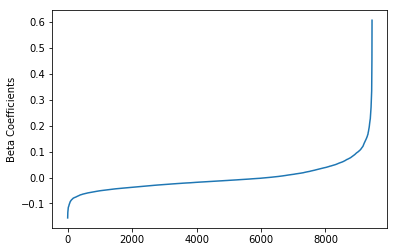

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

beta = np.sort(lr_model.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

### Summary has many components one can call

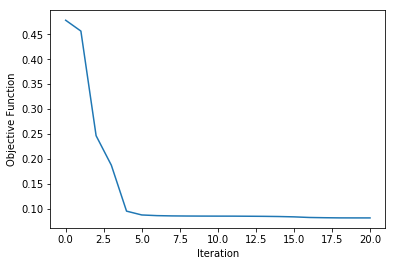

In [39]:
# Extract the summary from the returned LogisticRegressionModel instance trained
training_summary = lr_model.summary

# Obtain the objective per iteration
objective_history = training_summary.objectiveHistory
plt.plot(objective_history)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

areaUnderROC: 0.9999318102470105


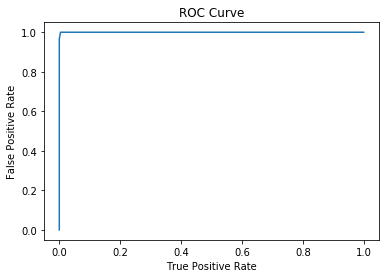

In [40]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print("areaUnderROC: " + str(training_summary.areaUnderROC))

#training_summary.roc.show(n=10, truncate=15)
roc = training_summary.roc.toPandas()
plt.plot(roc['FPR'], roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

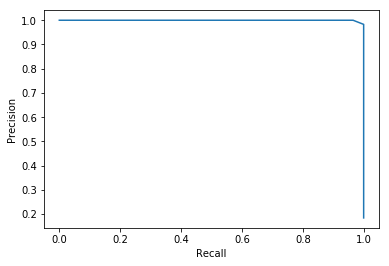

In [41]:
pr = training_summary.pr.toPandas()
plt.plot(pr['recall'], pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

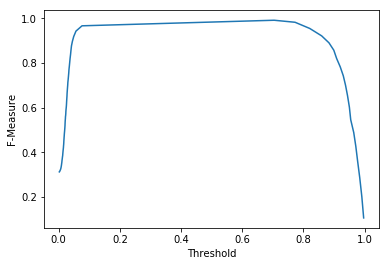

In [42]:
# Set the model threshold to maximize F-Measure
# training_summary.fMeasureByThreshold.show(n=10, truncate=15)
f = training_summary.fMeasureByThreshold.toPandas()
plt.plot(f['threshold'], f['F-Measure'])
plt.ylabel('F-Measure')
plt.xlabel('Threshold')
plt.show()

### Evaluate on test data

In [43]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lr_model.transform(test_data)

predictions.select("text", "probability").show(n=10, truncate=40)

+----------------------------------------+----------------------------------------+
|                                    text|                             probability|
+----------------------------------------+----------------------------------------+
|2d metal slug offers retro fun like s...|[0.9834031764485929,0.016596823551407...|
|a year to remember for irish there us...|[0.9732393678533745,0.02676063214662548]|
|a-listers flock to gervais sitcom hol...|[0.9290249866006702,0.07097501339932967]|
|aaliyah claim dismissed by court late...|[0.9606592013819558,0.03934079861804421]|
|actress roberts takes spider role act...|[0.9698329234124206,0.03016707658757933]|
|adventure tale tops awards young book...|[0.9620716254822244,0.03792837451777571]|
|african double in edinburgh world 500...|     [0.93668636003614,0.06331363996386]|
|aids and climate top davos agenda cli...|[0.8133204254881091,0.18667957451189096]|
|ajax refuse to rule out jol move ajax...|[0.9550015478208905,0.044998452179

#### Prediction object is a dataframe
with some options

In [44]:
predictions.printSchema()

root
 |-- text: string (nullable = true)
 |-- label: integer (nullable = false)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filtered: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [46]:
(
    predictions.filter(predictions['prediction'] == 1)
               .select("text", "probability", "label", "prediction")
               .orderBy("probability", ascending=False)
               .show(n=20, truncate=30)
)

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|kilroy names election seat ...|[0.47490833802528487,0.5250...|    1|       1.0|
|labour battle plan  hides b...|[0.45920694338567614,0.5407...|    1|       1.0|
|ukip s secret weapon  by an...|[0.45604120103444745,0.5439...|    1|       1.0|
|howard hits back at mongrel...|[0.4037319357981843,0.59626...|    1|       1.0|
|kilroy launches  veritas  p...|[0.1593707513917376,0.84062...|    1|       1.0|
|kilroy launches  veritas  p...|[0.004143930346847683,0.995...|    1|       1.0|
+------------------------------+------------------------------+-----+----------+



In [47]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
print("Training: Area Under ROC: " + str(training_summary.areaUnderROC))

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Training: Area Under ROC: 0.9999318102470105
Test: Area Under ROC: 0.8882706657972911


### Naive Bayes
#### Specify and fit the model

In [49]:
from pyspark.ml.classification import NaiveBayes

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1, modelType="multinomial")

# train the model
model = nb.fit(training_data)

#### Evaluate Naive Bayes

In [50]:
# select example rows to display.
predictions = model.transform(testData)
(
    predictions.filter(predictions['prediction'] == 1)
               .select("text", "probability", "label", "prediction")
               .orderBy("probability", ascending=False)
               .show(n=20, truncate=30)
)
# compute accuracy on the test set
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions,
                                                        {evaluator.metricName: "areaUnderROC"})))

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|visa decision  every 11 min...|[0.37103777191018145,0.6289...|    1|       1.0|
|labour trio  had vote-rig f...|[0.21700162075764273,0.7829...|    1|       1.0|
|golden rule boost for chanc...|[0.1638298114517564,0.83617...|    0|       1.0|
|uk youth  interested  in po...|[0.0170888983967556,0.98291...|    1|       1.0|
|hunt demo at labour meeting...|[0.00926010190492729,0.9907...|    1|       1.0|
|labour pig poster  anti-sem...|[0.0039107381218684316,0.99...|    1|       1.0|
|russia wto talks  make prog...|[0.0026726848549973683,0.99...|    0|       1.0|
|choose hope over fear - ken...|[5.402906411554848E-4,0.999...|    1|       1.0|
|wright-phillips to start on...|[2.2428830736313896E-4,0.99...|    0|       1.0|
|teenagers to be allowed to 

### Decision Tree
#### Fit model

In [51]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=3)

# Train model with Training Data
dtModel = dt.fit(trainingData)

In [52]:
print("numNodes = ", dtModel.numNodes)
print("depth = ", dtModel.depth)

numNodes =  13
depth =  3


#### Evaluate Decision Tree

In [53]:
predictions = dtModel.transform(testData)

(predictions.filter(predictions['prediction'] == 0)
            .select("text", "probability", "label", "prediction")
            .orderBy("probability", ascending=False)
            .show(n=10, truncate=30))

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|custody death rate  shocks ...|                     [1.0,0.0]|    1|       0.0|
|car giant hit by mercedes s...|[0.9397865853658537,0.06021...|    0|       0.0|
|download chart debut is del...|[0.9397865853658537,0.06021...|    0|       0.0|
|cabs collect mountain of mo...|[0.9397865853658537,0.06021...|    0|       0.0|
|apple sues to stop product ...|[0.9397865853658537,0.06021...|    0|       0.0|
|camera phones are  must-hav...|[0.9397865853658537,0.06021...|    0|       0.0|
|bank voted 8-1 for no rate ...|[0.9397865853658537,0.06021...|    0|       0.0|
|camera phones are  must-hav...|[0.9397865853658537,0.06021...|    0|       0.0|
|battered dollar hits anothe...|[0.9397865853658537,0.06021...|    0|       0.0|
|campbell rescues arsenal so

In [54]:
# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions,
                                                        {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.615598058393103


### Random Forest
#### Specify model

In [55]:
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label",
                            featuresCol="features",
                            numTrees=100,
                            maxDepth=4,
                            maxBins=32)

# Train model with Training Data
rfModel = rf.fit(trainingData)

#### Score and evaluate Random Forest

In [56]:
# Score test Data
predictions = rfModel.transform(testData)

(predictions.filter(predictions['prediction'] == 1)
            .select("text", "probability", "label", "prediction")
            .orderBy("probability", ascending=False)
            .show(n=10, truncate=30))

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|eu rules  won t stop uk spe...|[0.49744022433842305,0.5025...|    1|       1.0|
|kennedy questions trust of ...|[0.4965476467784302,0.50345...|    1|       1.0|
|women mps reveal sexist tau...|[0.4927852374678803,0.50721...|    1|       1.0|
|taxes must be trusted - ken...|[0.489848922426881,0.510151...|    1|       1.0|
|prime minister s questions ...|[0.4868544610620774,0.51314...|    1|       1.0|
|hague s six-figure earnings...|[0.4828864369016128,0.51711...|    1|       1.0|
|terror powers expose  tyran...|[0.4827847169728496,0.51721...|    1|       1.0|
|howard rebuts asylum critic...|[0.4824153889162775,0.51758...|    1|       1.0|
|brown comes out shooting la...|[0.4807219033862291,0.51927...|    1|       1.0|
|analysis: no pain  no gain 

In [57]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions,
                                                        {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.9841483735419847


### Implementing grid search with `CrossValidator` in pyspark

In [58]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

param_grid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100, 200])  # number of trees
             .addGrid(rf.maxDepth, [3, 4, 5])       # maximum depth
             # .addGrid(rf.maxBins, [24, 32, 40])   # Number of bins
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=5)

# Run cross validations
cv_model = cv.fit(training_data)

# Use test set here so we can measure the accuracy of our model on new data
predictions = cv_model.transform(test_data)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions,
                                                        {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.9867854814170831


## Which model had the best AUC?

### Learning goals in review. How did we do?
- align the relationships between Hadoop, Spark, and Databricks
- differentiate between Spark RDDs and Spark Dataframes and when each is appropriate
- locate and explore the Spark.ML documentation
- code along a text classification problem using four different ml algorithms, a data prep pipeline, and gridsearch to fine tune a model